[*********************100%***********************]  1 of 1 completed


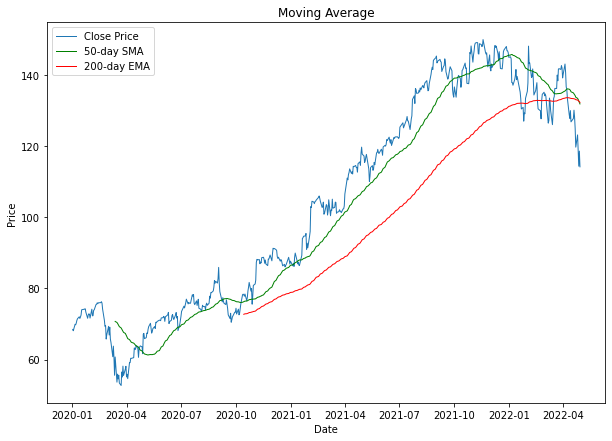

In [1]:
# Load the necessary packages and modules
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Simple Moving Average 
def SMA(data, ndays): 
    SMA = pd.Series(data['Close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
    EMA = pd.Series(data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

# Retrieve the Goolge stock data (practice) from Yahoo finance
data = yf.download('GOOGL', start="2020-01-01", end="2022-04-30")  ##change this to input! for name and dates
close = data['Close']

# Compute the 50-day SMA
n = 50
SMA = SMA(data,n)
SMA = SMA.dropna()
SMA = SMA['SMA']

# Compute the 200-day EWMA
ew = 200
EWMA = EWMA(data,ew)
EWMA = EWMA.dropna()
EWMA = EWMA['EWMA_200']

# Plotting the Google stock Price Series chart and Moving Averages below
plt.figure(figsize=(10,7))

# Set the title and axis labels
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot close price and moving averages
plt.plot(data['Close'],lw=1, label='Close Price')
plt.plot(SMA,'g',lw=1, label='50-day SMA')
plt.plot(EWMA,'r', lw=1, label='200-day EMA')

# Add a legend to the axis
plt.legend()

plt.show()

[*********************100%***********************]  1 of 1 completed


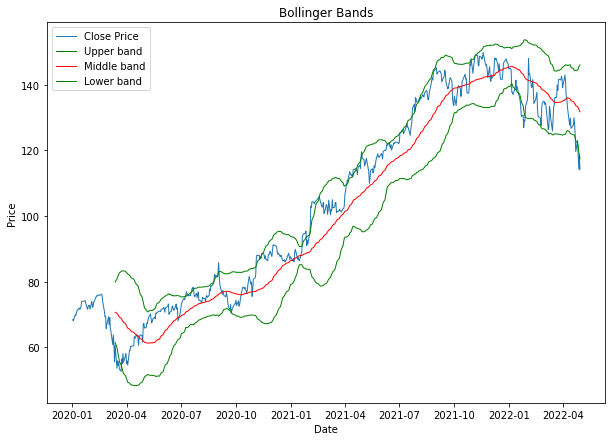

In [2]:
# Load the necessary packages and modules
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Compute the Bollinger Bands 
def BBANDS(data, window=n):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['MiddleBand'] = MA
    data['UpperBand'] = MA + (2 * SD) 
    data['LowerBand'] = MA - (2 * SD)
    return data
 
# Retrieve the Goolge stock data from Yahoo finance
data = yf.download('GOOGL', start="2020-01-01", end="2022-04-30")

# Compute the Bollinger Bands for Google using the 50-day Moving average
n = 50
BBANDS = BBANDS(data, n)

# Create the plot
# pd.concat([BBANDS.Close, BBANDS.UpperBB, BBANDS.LowerBB],axis=1).plot(figsize=(9,5),)

plt.figure(figsize=(10,7))

# Set the title and axis labels
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')

plt.plot(BBANDS.Close,lw=1, label='Close Price')
plt.plot(data['UpperBand'],'g',lw=1, label='Upper band')
plt.plot(data['MiddleBand'],'r',lw=1, label='Middle band')
plt.plot(data['LowerBand'],'g', lw=1, label='Lower band')

# Add a legend to the axis
plt.legend()

plt.show()